# Review of Fandango's star rating system

In [1]:
#read in the data
import pandas as pd
df1 =  pd.read_csv("fandango_score_comparison.csv")
df2 =  pd.read_csv("movie_ratings_16_17.csv")

### df1

fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

- FILM	The film in question
- Fandango_Stars	The number of stars the film had on its Fandango movie page
- Fandango_Ratingvalue	The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
- Fandango_votes	The number of user votes the film had on Fandango
- Fandango_Difference	The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

### df2
movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

- movie	the name of the movie
- the release year of the movie
- the Fandango rating of the movie (user score)

In [2]:
print(df1.shape)
print(df2.shape)

(146, 22)
(214, 15)


In [3]:
df1.columns.tolist()


['FILM',
 'RottenTomatoes',
 'RottenTomatoes_User',
 'Metacritic',
 'Metacritic_User',
 'IMDB',
 'Fandango_Stars',
 'Fandango_Ratingvalue',
 'RT_norm',
 'RT_user_norm',
 'Metacritic_norm',
 'Metacritic_user_nom',
 'IMDB_norm',
 'RT_norm_round',
 'RT_user_norm_round',
 'Metacritic_norm_round',
 'Metacritic_user_norm_round',
 'IMDB_norm_round',
 'Metacritic_user_vote_count',
 'IMDB_user_vote_count',
 'Fandango_votes',
 'Fandango_Difference']

In [4]:
df2.columns.tolist()

['movie',
 'year',
 'metascore',
 'imdb',
 'tmeter',
 'audience',
 'fandango',
 'n_metascore',
 'n_imdb',
 'n_tmeter',
 'n_audience',
 'nr_metascore',
 'nr_imdb',
 'nr_tmeter',
 'nr_audience']

In [5]:
df1_f = df1[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
#Removing movies made in 2014
df1_f["YEAR"] = df1_f["FILM"].apply(lambda x: x[-5:-1])
df_1_f = df1_f[df1_f["YEAR"]=="2015"].copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [6]:
df2_f = df2[['movie', 'year', 'fandango']]
df2_f = df2_f[df2_f["year"]==2016].copy()

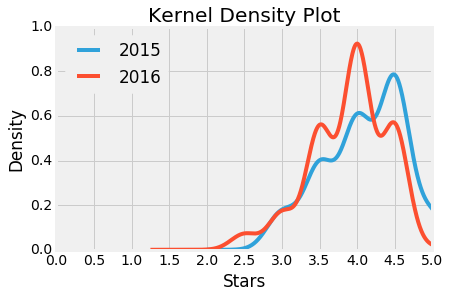

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline  

df1_f["Fandango_Stars"].plot.kde(label='2015')
df2_f["fandango"].plot.kde(label='2016')
plt.title("Kernel Density Plot")
plt.xlabel("Stars")
plt.ylabel("Density")
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)
plt.style.use('fivethirtyeight')
plt.legend(loc=2)
plt.show()

- Both curves feature Gaussian distribution
- 2015 curve is heavily left skewed
- 2016 curve distribution is more normal, but still left skewed
- both distributions are located on the upper side of the scale with no movies rated below 2 stars

### Use relative frequency tables to compare 2015 and 2016 distributions

In [54]:
#2015
df1_f["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [55]:
#2016
df2_f["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [104]:
mean_5 = df1_f["Fandango_Stars"].mean()
median_5 = df1_f["Fandango_Stars"].median() 
mode_5 = df1_f["Fandango_Stars"].mode()[0]
mean_6 = df2_f["fandango"].mean()
median_6 = df2_f["fandango"].median() 
mode_6 = df2_f["fandango"].mode()[0]

summary= pd.DataFrame()
summary["2015"]= [mean_5, median_5, mode_5]
summary["2016"]= [mean_6, median_6, mode_6]
summary.index = ["mean", "median", "mode"]        

summary

,2015,2016
mean,4.089041,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


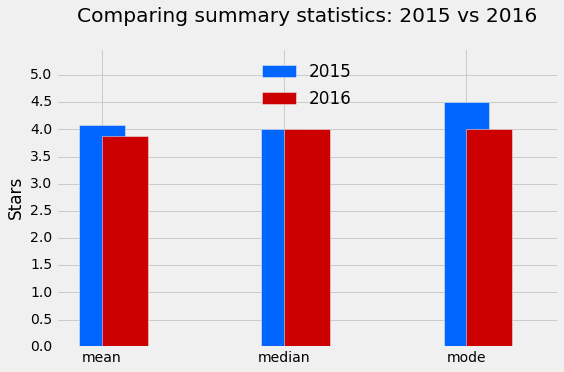

In [106]:
import numpy as np
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()
